In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra

import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
import seaborn as sns

# Any results you write to the current directory are saved as output.

sample_submission.csv
test
test.csv
train
train.csv



In [2]:
df_train = pd.read_csv("../input/train.csv",names=['id','spacegroup','numatoms','peral','perga','perin','a','b','c','alpha','beta','gamma','E0','Eg'],skiprows=1)
df_topredict = pd.read_csv("../input/test.csv",names=['id','spacegroup','numatoms','peral','perga','perin','a','b','c','alpha','beta','gamma','E0','Eg'],skiprows=1)

Lets go ahead and see what the data to train on and the data to predict on looks like

In [3]:
df_train.head()

,id,spacegroup,numatoms,peral,perga,perin,a,b,c,alpha,beta,gamma,E0,Eg
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [4]:

df_topredict.head()

,id,spacegroup,numatoms,peral,perga,perin,a,b,c,alpha,beta,gamma,E0,Eg
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006,NaN,NaN
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015,NaN,NaN
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014,NaN,NaN
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002,NaN,NaN
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001,NaN,NaN


In [5]:
df_cpy = df_train.copy()
df_topredictcpy = df_topredict.copy()


In [6]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
id            2400 non-null int64
spacegroup    2400 non-null int64
numatoms      2400 non-null float64
peral         2400 non-null float64
perga         2400 non-null float64
perin         2400 non-null float64
a             2400 non-null float64
b             2400 non-null float64
c             2400 non-null float64
alpha         2400 non-null float64
beta          2400 non-null float64
gamma         2400 non-null float64
E0            2400 non-null float64
Eg            2400 non-null float64
dtypes: float64(12), int64(2)
memory usage: 262.6 KB


In [7]:
df_cpy.isnull().sum()

id            0
spacegroup    0
numatoms      0
peral         0
perga         0
perin         0
a             0
b             0
c             0
alpha         0
beta          0
gamma         0
E0            0
Eg            0
dtype: int64

So we have no null values in the dataset.Here i am rounding of the angles. It shouldn't matter much as far the prediction algorithm goes. The reason for the rounding of the angles is that crystal structures usually have well defined angles (90, 90, 90 for cubic; 90,90,120 for hexagonal and so on).

So, lets go ahead and see how the values the lattice angles take.

In [8]:
df_cpy['alpha'].unique()

array([  90.0026,   90.0186,   90.9688,   89.9888,   89.996 ,   91.1235,
         90.0009,   89.9997,   90.0025,   90.0172,   89.9909,   90.0189,
         90.0044,   90.0059,   90.0152,   90.0089,   90.0003,   89.9942,
         90.    ,   89.9988,   89.9903,   90.0046,   89.9883,   90.0055,
         90.0159,   90.5713,   90.0001,   90.002 ,   90.0123,   96.7363,
         90.0037,   89.9995,   90.0034,   89.9998,   90.0033,   90.0019,
         90.042 ,   90.0029,   89.9999,   90.005 ,   90.004 ,   90.0062,
         90.003 ,   90.0153,   90.0035,   88.075 ,   90.0119,   90.0187,
         94.2984,   89.9923,   89.9979,   90.0038,   90.0045,   90.0085,
         98.1747,   89.9983,   90.0012,   90.0178,   98.4826,   90.796 ,
         89.9894,   90.0023,   89.9978,   90.0105,   90.0137,   90.0028,
         90.0091,   90.0036,   90.9296,   90.0042,   89.9938,   93.9475,
         90.0101,   90.001 ,   89.9991,   90.0171,   90.0032,   89.9912,
         90.0004,   90.0006,   90.0057,   90.0039, 

In [9]:
df_cpy['beta'].unique()

array([  90.0023,   89.998 ,   91.1228,   90.0119,   90.0006,   91.3033,
         90.0008,  105.179 ,   90.003 ,   89.9994,   90.0103,   90.0024,
         90.0051,   90.0071,  104.8418,  105.241 ,   90.0065,  105.0943,
         90.0102,   90.0031,   90.0127,   90.0021,   90.0033,   90.6612,
        104.8049,   90.0054,   97.9868,   90.0005,  104.3985,  104.4804,
         90.0001,   89.9989,   88.1559,   90.    ,  104.7882,   90.002 ,
         90.0011,   90.0015,   90.0032,  103.8357,   90.0037,   90.0016,
         87.7806,   90.0019,   89.9985,   90.0009,   90.0081,   93.5832,
         90.0089,   89.9996,   90.0042,   90.004 ,   90.0017,   89.999 ,
         99.6   ,  104.4371,   90.0003,   90.0002,   89.9991,   99.9592,
         90.9241,   89.9982,   90.0117,   90.0028,  104.6359,  103.7911,
         90.0025,   91.077 ,   90.0044,  104.6466,   90.0075,   93.3283,
         90.0038,   90.0014,   89.9993,   89.9968,   90.0035,   90.0099,
         90.0004,   89.9958,   90.0046,   90.0048, 

In [10]:
df_cpy['gamma'].unique()

array([  90.0017,  120.0025,   30.5185,  120.0017,  119.9893,   30.573 ,
         89.9987,   90.0001,   89.9978,  119.9997,  120.0011,  120.0021,
         90.0015,   89.9933,  119.9918,  120.0051,   90.    ,  120.001 ,
        120.0016,  119.9922,  120.0015,   90.001 ,  120.0023,   30.2512,
         89.9991,  119.9935,   32.4294,   90.0006,   90.0002,   89.9955,
         90.0004,  120.0197,  119.9897,   90.0007,  120.0065,   89.9969,
        120.0014,   90.0009,   30.3034,  120.0044,  120.0009,  119.9925,
         30.1116,   90.0005,   90.0016,   89.9946,  119.9993,   31.4714,
         90.002 ,  120.0001,   31.4469,   30.3005,   90.0013,  120.0012,
        120.0048,  119.9979,  119.991 ,   89.9953,   30.5048,   89.9963,
        120.0007,   30.1185,  119.9946,  120.0006,  120.0036,   89.9994,
         89.9956,   89.9992,   89.9931,   89.9967,   90.0018,   89.9993,
         30.2148,  119.9949,   89.9979,  119.9959,   89.9986,  119.9915,
         89.9965,  120.0005,   90.0003,   89.9989, 

In [11]:
df_cpy['alpha'] = np.round(df_cpy['alpha'])
df_cpy['beta'] = np.round(df_cpy['beta'])
df_cpy['gamma'] = np.round(df_cpy['gamma'])
df_topredictcpy['alpha'] = np.round(df_topredictcpy['alpha'])
df_topredictcpy['beta'] = np.round(df_topredictcpy['beta'])
df_topredictcpy['gamma'] = np.round(df_topredictcpy['gamma'])

So we se that the lattice angles alpha and beta always take values near 90 with some variation ~10 degrees, whereas the lattice angle gamma takes on either 90 or 120 or 30 degrees. The lattice angles 120 degrees and 30 degrees are pretty much equivalent and are representative of the hexagonal crystal structure. 

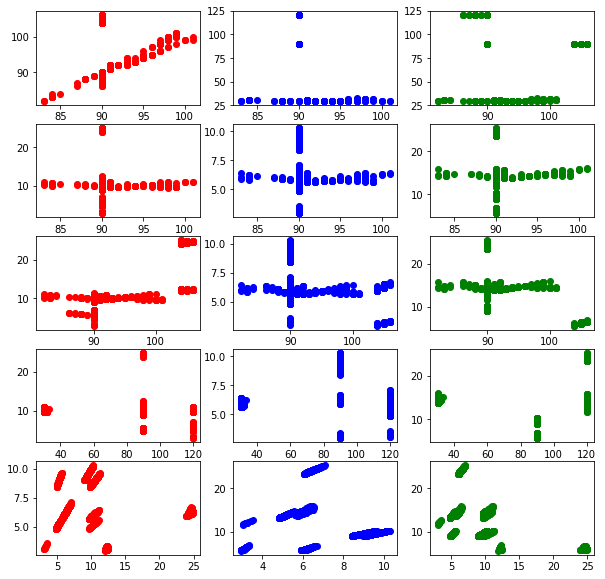

In [12]:
f,ax = plt.subplots(5,3,figsize=(10,10))
ax[0,0].plot(df_cpy['alpha'],df_cpy['beta'],'ro')
ax[0,1].plot(df_cpy['alpha'],df_cpy['gamma'],'bo')
ax[0,2].plot(df_cpy['beta'],df_cpy['gamma'],'go')
ax[1,0].plot(df_cpy['alpha'],df_cpy['a'],'ro')
ax[1,1].plot(df_cpy['alpha'],df_cpy['b'],'bo')
ax[1,2].plot(df_cpy['alpha'],df_cpy['c'],'go')
ax[2,0].plot(df_cpy['beta'],df_cpy['a'],'ro')
ax[2,1].plot(df_cpy['beta'],df_cpy['b'],'bo')
ax[2,2].plot(df_cpy['beta'],df_cpy['c'],'go')
ax[3,0].plot(df_cpy['gamma'],df_cpy['a'],'ro')
ax[3,1].plot(df_cpy['gamma'],df_cpy['b'],'bo')
ax[3,2].plot(df_cpy['gamma'],df_cpy['c'],'go')
ax[4,0].plot(df_cpy['a'],df_cpy['b'],'ro')
ax[4,1].plot(df_cpy['b'],df_cpy['c'],'bo')
ax[4,2].plot(df_cpy['a'],df_cpy['c'],'go')

**Correlation of features**

Now lets go ahead and see how the features are correlated and see if they have any similarities.

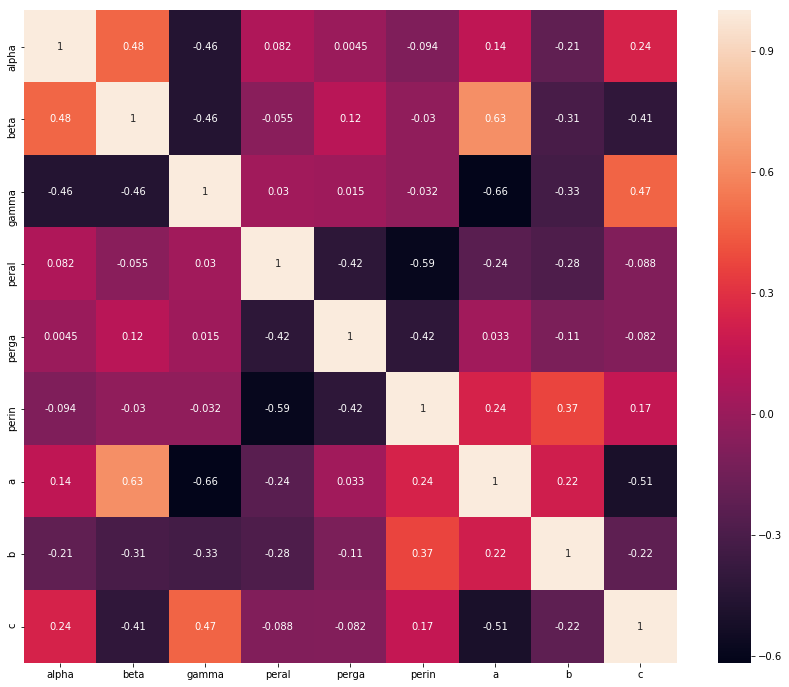

In [13]:
cols = df_cpy[['alpha','beta','gamma','peral','perga','perin','a','b','c']]
corrmat = cols.corr(method='spearman')
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, vmax=1., square=True,annot=True,robust=True)

I focus only on the pairs whcih yield high values of correlation (ie >0.4) because a lot of the cases below this value might purley be an artifact of the dataset. Let us start with the lattice angles. 

Alpha has a strong positive correlation with beta and a strong negative correlation with gamma.  In principle, that is not the case expected in crystal systems as the lattice angles are fully independent to vary with respect to each other. So this correlation might strongly be influenced by the particular dataset we are looking at.  Lets plot these angles wrt to each other and see how they vary.


Now, lets look at the different spacegroups and see what spacegroups the structures are taken from. 

In [14]:
sorted(df_cpy['spacegroup'].unique())


[12, 33, 167, 194, 206, 227]

In [15]:
sorted(df_topredictcpy['spacegroup'].unique())

[12, 33, 167, 194, 206, 227]

Text(0,0.5,'% of sample set')

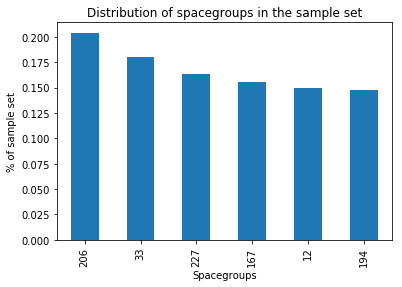

In [16]:
df_cpy['spacegroup'].value_counts(normalize=True).plot.bar()
plt.title("Distribution of spacegroups in the sample set")
plt.xlabel("Spacegroups")
plt.ylabel("% of sample set")

Text(0,0.5,'% of sample set')

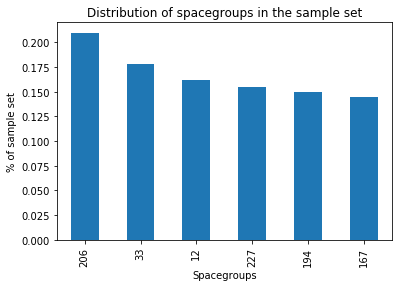

In [17]:
df_topredictcpy['spacegroup'].value_counts(normalize=True).plot.bar()
plt.title("Distribution of spacegroups in the sample set")
plt.xlabel("Spacegroups")
plt.ylabel("% of sample set")

So, we see that the samples used for training and samples to be predicted are from the same spacegroups. The distribution of the samples in the different spacegroups in both the training set and the set to be predicted takes a similar distribution. So, we know that the sample taken for training is a good statistical sample set. 

Now,let's look at the geometric characteristics of each spacegroup based on the dataset we have

In [18]:
crystal_vectors = ['a','b','c','alpha','beta','gamma']

In [19]:
crystal_vectors_withbandandenergy = ['a','b','c','alpha','beta','gamma','Eg','E0']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5616f0e668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f56169da860>]], dtype=object)

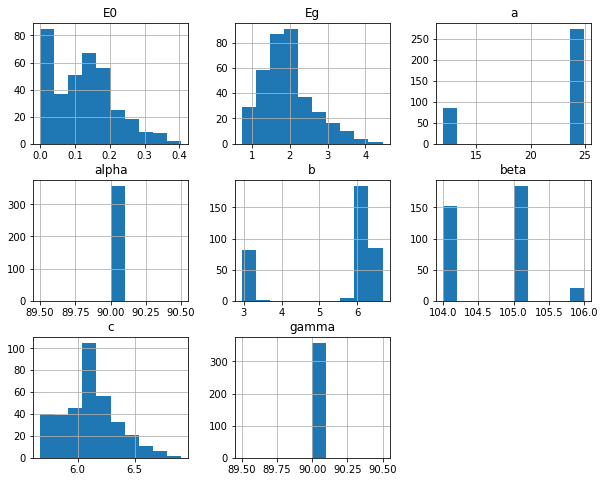

In [20]:
#plt.subplots(figsize=(15,12))
df_cpy[df_cpy['spacegroup']==12].hist(figsize=(10,8),column=crystal_vectors_withbandandenergy)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5616993d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5616490d30>]], dtype=object)

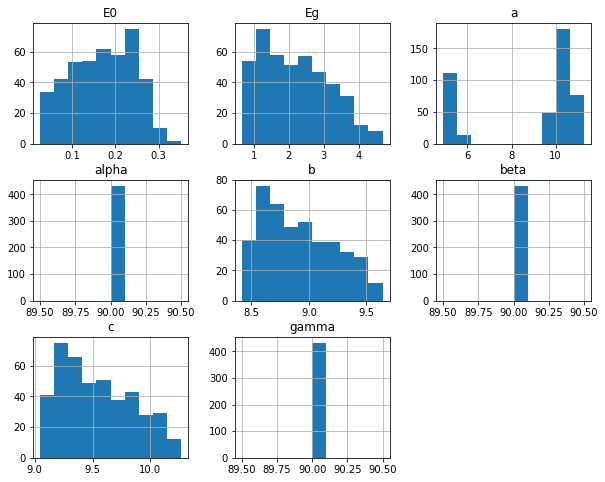

In [21]:
#plt.subplots(figsize=(15,12))
df_cpy[df_cpy['spacegroup']==33].hist(figsize=(10,8),column=crystal_vectors_withbandandenergy)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56163e5780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5616109470>]], dtype=object)

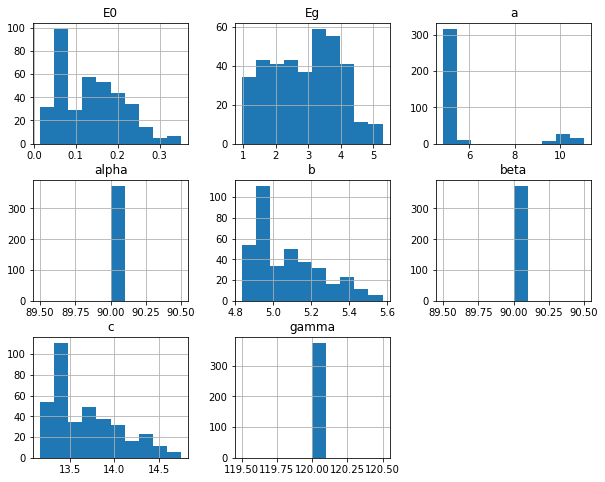

In [22]:
#plt.subplots(figsize=(15,12))
df_cpy[df_cpy['spacegroup']==167].hist(figsize=(10,8),column=crystal_vectors_withbandandenergy)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5615f988d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5615d84fd0>]], dtype=object)

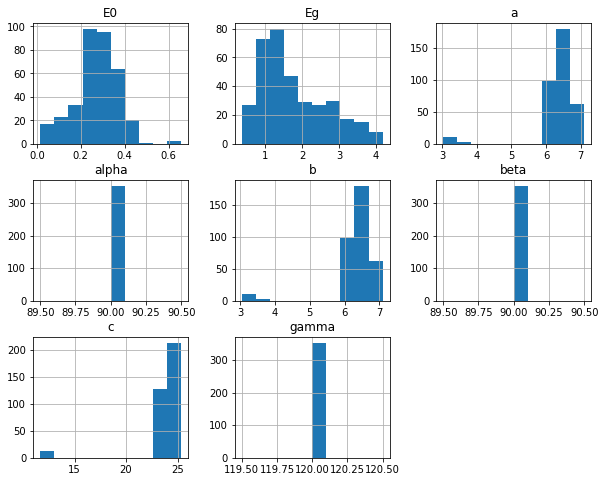

In [23]:
#plt.subplots(figsize=(15,12))
df_cpy[df_cpy['spacegroup']==194].hist(figsize=(10,8),column=crystal_vectors_withbandandenergy)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5615bfbc18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f56159e8d68>]], dtype=object)

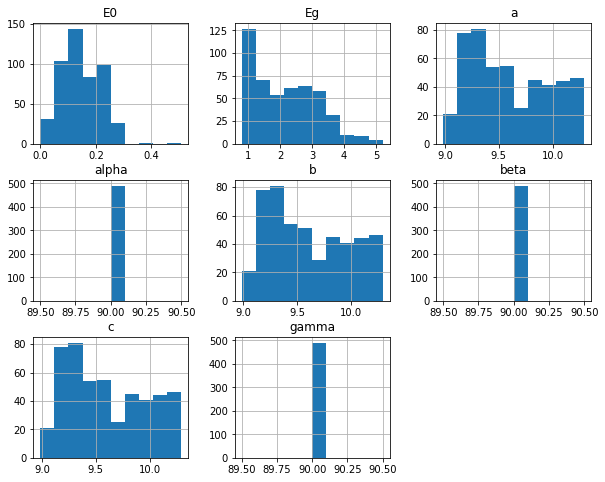

In [24]:
#plt.subplots(figsize=(15,12))
df_cpy[df_cpy['spacegroup']==206].hist(figsize=(10,8),column=crystal_vectors_withbandandenergy)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f561582e7f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f561567a048>]], dtype=object)

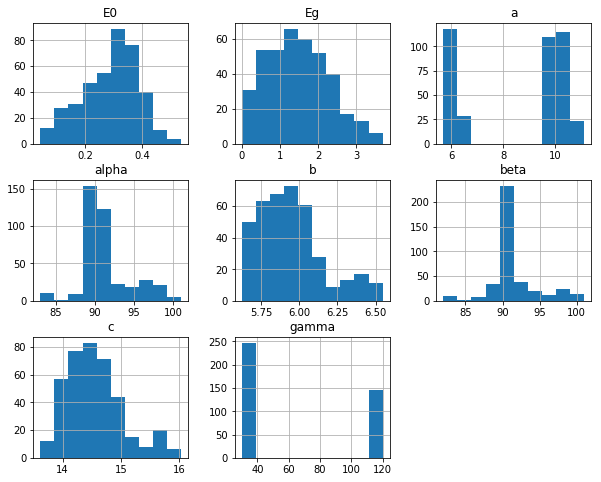

In [25]:
#plt.subplots(figsize=(15,12))
df_cpy[df_cpy['spacegroup']==227].hist(figsize=(10,8),column=crystal_vectors_withbandandenergy)


In [26]:
df_cpy.groupby(['spacegroup'])['Eg'].describe()

,count,mean,std,min,25%,50%,75%,max
spacegroup,,,,,,,,
12,358.0,1.938706,0.667863,0.7220,1.480750,1.85690,2.251075,4.4587
33,432.0,2.196816,0.961137,0.6522,1.366475,2.07890,2.971500,4.6795
167,374.0,2.896165,1.066193,0.9439,1.979825,2.99680,3.716150,5.2861
194,353.0,1.760744,0.881789,0.3717,1.096400,1.50850,2.369200,4.1785
206,490.0,2.157506,0.991159,0.7883,1.214950,2.06875,2.905275,5.2114
227,393.0,1.476654,0.802300,0.0001,0.860900,1.44360,2.035700,3.6851


(array([   7.,   27.,   73.,    0.,  123.,    0.,    0.,   14.,    0.,  356.]),
 array([ 10.,  17.,  24.,  31.,  38.,  45.,  52.,  59.,  66.,  73.,  80.]),
 <a list of 10 Patch objects>)

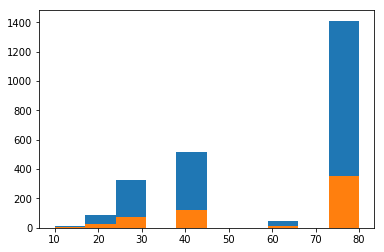

In [27]:
plt.hist(df_cpy['numatoms'])
plt.hist(df_topredictcpy['numatoms'])

In [28]:
df_cpy.head()

,id,spacegroup,numatoms,peral,perga,perin,a,b,c,alpha,beta,gamma,E0,Eg
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0,90.0,90.0,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0,90.0,120.0,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,91.0,91.0,31.0,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,90.0,90.0,120.0,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,90.0,90.0,120.0,0.0505,1.3793


In [29]:
df_cpy = df_cpy.drop(['numatoms'],axis=1)
df_topredictcpy = df_topredictcpy.drop(['numatoms'],axis=1)

In [30]:
#df_cpy = df_cpy.drop(['lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang'],axis=1)
#df_topredictcpy = df_topredictcpy.drop(['lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang'],axis=1)


In [31]:
df_topredictcpy.head()

,id,spacegroup,peral,perga,perin,a,b,c,alpha,beta,gamma,E0,Eg
0,1,33,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,90.0,90.0,90.0,NaN,NaN
1,2,33,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0,90.0,90.0,NaN,NaN
2,3,167,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,90.0,90.0,120.0,NaN,NaN
3,4,12,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,90.0,104.0,90.0,NaN,NaN
4,5,12,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0,105.0,90.0,NaN,NaN


In [32]:
df_cpy.head()

,id,spacegroup,peral,perga,perin,a,b,c,alpha,beta,gamma,E0,Eg
0,1,33,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0,90.0,90.0,0.0680,3.4387
1,2,194,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0,90.0,120.0,0.2490,2.9210
2,3,227,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,91.0,91.0,31.0,0.1821,2.7438
3,4,167,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,90.0,90.0,120.0,0.2172,3.3492
4,5,194,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,90.0,90.0,120.0,0.0505,1.3793


In [33]:
df_cpy = df_cpy.drop(['id'],axis=1)

In [34]:

df_topredictcpy = df_topredictcpy.drop(['id'],axis=1)

In [35]:
df_cpy.head()

,spacegroup,peral,perga,perin,a,b,c,alpha,beta,gamma,E0,Eg
0,33,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0,90.0,90.0,0.0680,3.4387
1,194,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0,90.0,120.0,0.2490,2.9210
2,227,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,91.0,91.0,31.0,0.1821,2.7438
3,167,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,90.0,90.0,120.0,0.2172,3.3492
4,194,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,90.0,90.0,120.0,0.0505,1.3793


In [36]:
df_topredictcpy.head()

,spacegroup,peral,perga,perin,a,b,c,alpha,beta,gamma,E0,Eg
0,33,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,90.0,90.0,90.0,NaN,NaN
1,33,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0,90.0,90.0,NaN,NaN
2,167,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,90.0,90.0,120.0,NaN,NaN
3,12,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,90.0,104.0,90.0,NaN,NaN
4,12,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0,105.0,90.0,NaN,NaN


Text(0.5,0,'% of Aluminium')

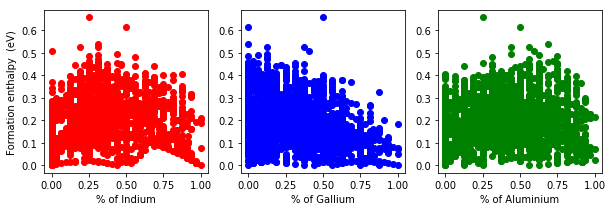

In [37]:
f,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].plot(df_cpy['perin'],df_cpy['E0'],'ro')
ax[0].set_xlabel("% of Indium")
ax[0].set_ylabel("Formation enthalpy  (eV)")
ax[1].plot(df_cpy['perga'],df_cpy['E0'],'bo')
ax[1].set_xlabel("% of Gallium")
ax[2].plot(df_cpy['peral'],df_cpy['E0'],'go')
ax[2].set_xlabel("% of Aluminium")


Text(0.5,0,'% of Aluminium')

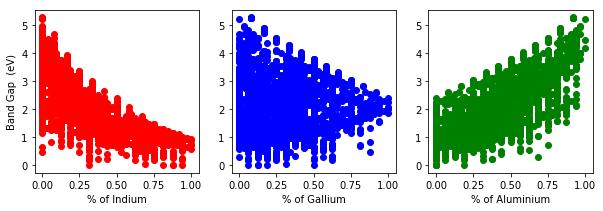

In [38]:
f,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].plot(df_cpy['perin'],df_cpy['Eg'],'ro')
ax[0].set_xlabel("% of Indium")
ax[0].set_ylabel("Band Gap  (eV)")
ax[1].plot(df_cpy['perga'],df_cpy['Eg'],'bo')
ax[1].set_xlabel("% of Gallium")
ax[2].plot(df_cpy['peral'],df_cpy['Eg'],'go')
ax[2].set_xlabel("% of Aluminium")

## 

In [39]:
df_cpy.head()

,spacegroup,peral,perga,perin,a,b,c,alpha,beta,gamma,E0,Eg
0,33,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0,90.0,90.0,0.0680,3.4387
1,194,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0,90.0,120.0,0.2490,2.9210
2,227,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,91.0,91.0,31.0,0.1821,2.7438
3,167,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,90.0,90.0,120.0,0.2172,3.3492
4,194,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,90.0,90.0,120.0,0.0505,1.3793


In [40]:
cols = df_cpy[['peral','perga','perin','a','b','c','Eg','E0']]

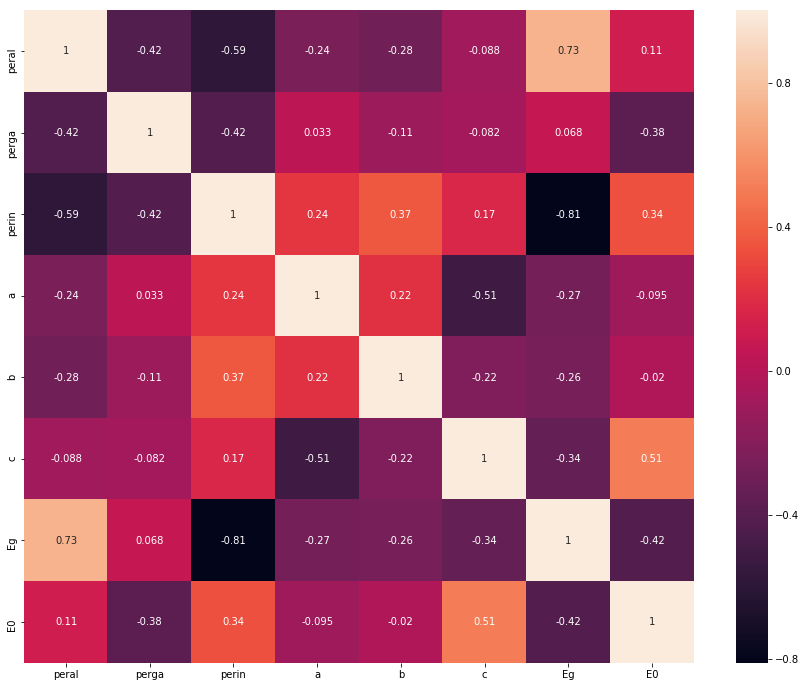

In [41]:
corr_matrix = cols.corr(method='spearman')

plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix,annot=True)

In [42]:
df_cpy['alpha_reduced'] = df_cpy['alpha']/max(df_cpy['alpha'])
df_cpy['beta_reduced'] = df_cpy['beta']/max(df_cpy['beta'])
df_cpy['gamma_reduced'] = df_cpy['gamma']/max(df_cpy['gamma'])
df_topredictcpy['alpha_reduced'] = df_topredictcpy['alpha']/max(df_topredictcpy['alpha'])
df_topredictcpy['beta_reduced'] = df_topredictcpy['beta']/max(df_topredictcpy['beta'])
df_topredictcpy['gamma_reduced'] = df_topredictcpy['gamma']/max(df_topredictcpy['gamma'])

In [43]:
df_cpy.head()

,spacegroup,peral,perga,perin,a,b,c,alpha,beta,gamma,E0,Eg,alpha_reduced,beta_reduced,gamma_reduced
0,33,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0,90.0,90.0,0.0680,3.4387,0.891089,0.849057,0.750000
1,194,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0,90.0,120.0,0.2490,2.9210,0.891089,0.849057,1.000000
2,227,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,91.0,91.0,31.0,0.1821,2.7438,0.900990,0.858491,0.258333
3,167,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,90.0,90.0,120.0,0.2172,3.3492,0.891089,0.849057,1.000000
4,194,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,90.0,90.0,120.0,0.0505,1.3793,0.891089,0.849057,1.000000


In [44]:
df_cpy = df_cpy.drop(['alpha','beta','gamma'],axis=1)
df_topredictcpy = df_topredictcpy.drop(['alpha','beta','gamma'],axis=1)

In [45]:
spacegroup_mapping = {12:1,33:2,167:3, 194:4, 206:5,227:6}

In [46]:
df_cpy['structure_mapped']=df_cpy['spacegroup'].map(spacegroup_mapping)
df_topredictcpy['structure_mapped']=df_topredictcpy['spacegroup'].map(spacegroup_mapping)

In [47]:
df_cpy = df_cpy.drop(['spacegroup'],axis=1)
df_topredictcpy = df_topredictcpy.drop(['spacegroup'],axis=1)

In [48]:
df_topredictcpy.head()

,peral,perga,perin,a,b,c,E0,Eg,alpha_reduced,beta_reduced,gamma_reduced,structure_mapped
0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,NaN,NaN,0.891089,0.849057,0.75,2
1,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,NaN,NaN,0.891089,0.849057,0.75,2
2,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,NaN,NaN,0.891089,0.849057,1.00,3
3,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,NaN,NaN,0.891089,0.981132,0.75,1
4,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,NaN,NaN,0.891089,0.990566,0.75,1


In [49]:
one_hot = pd.get_dummies(df_cpy['structure_mapped'],columns=['sg12','sg33','sg167','sg194','sg206','sg227'])
one_hot_topredict = pd.get_dummies(df_topredictcpy['structure_mapped'],columns=['sg12','sg33','sg167','sg194','sg206','sg227'])

In [50]:
one_hot.head()

,1,2,3,4,5,6
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,1,0,0


In [51]:
one_hot_topredict.head()

,1,2,3,4,5,6
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [52]:
df_cpy = df_cpy.join(one_hot)
df_topredictcpy = df_topredictcpy.join(one_hot_topredict)

In [53]:
df_cpy.head()

,peral,perga,perin,a,b,c,E0,Eg,alpha_reduced,beta_reduced,gamma_reduced,structure_mapped,1,2,3,4,5,6
0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,0.0680,3.4387,0.891089,0.849057,0.750000,2,0,1,0,0,0,0
1,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,0.2490,2.9210,0.891089,0.849057,1.000000,4,0,0,0,1,0,0
2,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,0.1821,2.7438,0.900990,0.858491,0.258333,6,0,0,0,0,0,1
3,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,0.2172,3.3492,0.891089,0.849057,1.000000,3,0,0,1,0,0,0
4,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,0.0505,1.3793,0.891089,0.849057,1.000000,4,0,0,0,1,0,0


In [54]:
#df.rename(columns={'Leader': 'Commander'}, inplace=True)

In [55]:
df_cpy.rename(columns={1: 'sg12', 2: 'sg33',3: 'sg167',4: 'sg194',5: 'sg206',6: 'sg227'},inplace=True)
df_topredictcpy.rename(columns={1: 'sg12', 2: 'sg33',3: 'sg167',4: 'sg194',5: 'sg206',6: 'sg227'},inplace=True)

In [56]:
df_cpy = df_cpy.drop(['structure_mapped'],axis=1)
df_topredictcpy = df_topredictcpy.drop(['structure_mapped'],axis=1)

In [57]:
df_topredictcpy.head()

,peral,perga,perin,a,b,c,E0,Eg,alpha_reduced,beta_reduced,gamma_reduced,sg12,sg33,sg167,sg194,sg206,sg227
0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,NaN,NaN,0.891089,0.849057,0.75,0,1,0,0,0,0
1,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,NaN,NaN,0.891089,0.849057,0.75,0,1,0,0,0,0
2,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,NaN,NaN,0.891089,0.849057,1.00,0,0,1,0,0,0
3,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,NaN,NaN,0.891089,0.981132,0.75,1,0,0,0,0,0
4,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,NaN,NaN,0.891089,0.990566,0.75,1,0,0,0,0,0


In [58]:
band = df_cpy['Eg']
energy = df_cpy['E0']

In [59]:
df_cpy = df_cpy.drop(['Eg','E0'],axis=1)

In [60]:
df_cpy.head()

,peral,perga,perin,a,b,c,alpha_reduced,beta_reduced,gamma_reduced,sg12,sg33,sg167,sg194,sg206,sg227
0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,0.891089,0.849057,0.750000,0,1,0,0,0,0
1,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,0.891089,0.849057,1.000000,0,0,0,1,0,0
2,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,0.900990,0.858491,0.258333,0,0,0,0,0,1
3,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,0.891089,0.849057,1.000000,0,0,1,0,0,0
4,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,0.891089,0.849057,1.000000,0,0,0,1,0,0


In [61]:
df_cpy.rename(columns={1:'sg12',2:'sg33',3:'sg167',4:'sg194',5:'sg206',6:'sg227'},inplace=True)
df_topredictcpy.rename(columns={1:'sg12',2:'sg33',3:'sg167',4:'sg194',5:'sg206',6:'sg227'},inplace=True)

In [62]:
def scale(a):
    return a/26.00

In [63]:
df_cpy[['a','b','c']] = df_cpy[['a','b','c']].apply(scale)


In [64]:
df_topredictcpy[['a','b','c']]=df_topredictcpy[['a','b','c']].apply(scale)

In [65]:
df_cpy.head()

,peral,perga,perin,a,b,c,alpha_reduced,beta_reduced,gamma_reduced,sg12,sg33,sg167,sg194,sg206,sg227
0,0.6250,0.3750,0.000,0.382781,0.328896,0.352981,0.891089,0.849057,0.750000,0,1,0,0,0,0
1,0.6250,0.3750,0.000,0.237846,0.237838,0.908796,0.891089,0.849057,1.000000,0,0,0,1,0,0
2,0.8125,0.1875,0.000,0.375038,0.217673,0.537038,0.900990,0.858491,0.258333,0,0,0,0,0,1
3,0.7500,0.0000,0.250,0.192446,0.192438,0.520454,0.891089,0.849057,1.000000,0,0,1,0,0,0
4,0.0000,0.6250,0.375,0.256208,0.256200,0.945435,0.891089,0.849057,1.000000,0,0,0,1,0,0


In [66]:
df_topredictcpy.dropna(axis=1,inplace=True)

In [67]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neural_network import  MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,Y_train,Y_test = train_test_split(df_cpy,band,test_size=0.2,random_state = 42)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [68]:
print (Y_test.shape)

(480,)


In [69]:
#Y_test = np.array(Y_test)

In [70]:
print (X_train.shape,X_test.shape)

(1920, 15) (480, 15)


In [71]:
clf_tree_band = DecisionTreeRegressor(random_state = 42, max_depth=10,min_samples_split=2)
#clf_gauss = GaussianNB()
clf_kernal_band = KernelRidge(alpha=1)
clf_linear_band = LinearRegression()
clf_svr_band = SVR()
clf_neural_band = MLPRegressor(hidden_layer_sizes=10, solver="sgd",early_stopping=True)
clf_neigh_band = KNeighborsRegressor(n_neighbors=10)
clf_random_band = RandomForestRegressor(n_estimators=100)

In [72]:
clf_tree_band.fit(X_train,Y_train)
#clf_gauss.fit(X_train,Y_train)
clf_kernal_band.fit(X_train,Y_train)
clf_linear_band.fit(X_train,Y_train)
clf_svr_band.fit(X_train,Y_train)
clf_neural_band.fit(X_train,Y_train)
clf_neigh_band.fit(X_train,Y_train)
clf_random_band.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
pred_tree_band = clf_tree_band.predict(X_test)
pred_kernal_band = clf_kernal_band.predict(X_test)
pred_linear_band = clf_linear_band.predict(X_test)
pred_svr_band = clf_svr_band.predict(X_test)
pred_neural_band = clf_neural_band.predict(X_test)
pred_neigh_band = clf_neigh_band.predict(X_test)
pred_random_band = clf_random_band.predict(X_test)

In [74]:
#pred=  np.array(pred)
from sklearn.metrics import  mean_squared_error

In [75]:
#clf_tree.score(pred,Y_test)
print(1- mean_squared_error(Y_test,pred_tree_band))
print(1- mean_squared_error(Y_test,pred_kernal_band))
print(1- mean_squared_error(Y_test,pred_linear_band))
print(1- mean_squared_error(Y_test,pred_svr_band))
print(1- mean_squared_error(Y_test,pred_neural_band))
print (1- mean_squared_error(Y_test,pred_neigh_band))
print (1- mean_squared_error(Y_test,pred_random_band))

0.906840847488
0.891074597926
0.888973624826
0.930469454433
0.889969494341
0.922687383274
0.936791943186


In [76]:
Y_test = np.array(Y_test)
from sklearn.metrics import mean_absolute_error

In [77]:
err_array=[];
for i in range(len(pred_random_band)):
    err = abs(pred_random_band[i]-Y_test[i])
    err_array.append(err)
max_error = max(err_array)   
print (np.mean(err_array))
print (max_error)  

    

0.146459353589
1.64849568492


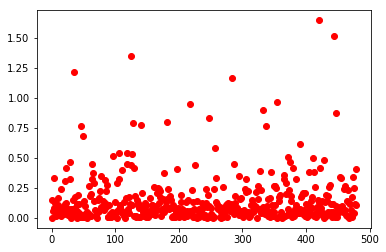

In [78]:
plt.plot(err_array,'ro')
#plt.plot(avg_error,err_array.index)

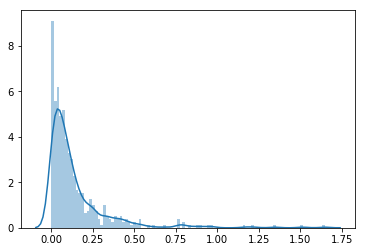

In [79]:
sns.distplot(err_array,bins=100)

In [80]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neural_network import  MLPRegressor
from sklearn.ensemble import RandomForestRegressor

X_train_enthalpy,X_test_enthalpy,Y_train_enthalpy,Y_test_enthalpy = train_test_split(df_cpy,energy,test_size=0.2,random_state = 42)

In [81]:
clf_tree_enthalpy = DecisionTreeRegressor(random_state = 42, max_depth=10,min_samples_split=2)
#clf_gauss = GaussianNB()
clf_kernal_enthalpy = KernelRidge(alpha=1)
clf_linear_enthalpy = LinearRegression()
clf_svr_enthalpy = SVR()
clf_neural_enthalpy = MLPRegressor(hidden_layer_sizes=10, solver="sgd",early_stopping=True)
clf_random_enthalpy = RandomForestRegressor(n_estimators=100)

In [82]:
clf_tree_enthalpy.fit(X_train_enthalpy,Y_train_enthalpy)
#clf_gauss.fit(X_train,Y_train)
clf_kernal_enthalpy.fit(X_train_enthalpy,Y_train_enthalpy)
clf_linear_enthalpy.fit(X_train_enthalpy,Y_train_enthalpy)
clf_svr_enthalpy.fit(X_train_enthalpy,Y_train_enthalpy)
clf_neural_enthalpy.fit(X_train_enthalpy,Y_train_enthalpy)
clf_random_enthalpy.fit(X_train_enthalpy,Y_train_enthalpy)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [83]:
pred_tree_enthalpy = clf_tree_enthalpy.predict(X_test_enthalpy)
pred_kernal_enthalpy = clf_kernal_enthalpy.predict(X_test_enthalpy)
pred_linear_enthalpy = clf_linear_enthalpy.predict(X_test_enthalpy)
pred_svr_enthalpy = clf_svr_enthalpy.predict(X_test_enthalpy)
pred_neural_enthalpy = clf_neural_enthalpy.predict(X_test_enthalpy)
pred_random_enthalpy = clf_random_enthalpy.predict(X_test_enthalpy)

In [84]:
print(1- mean_squared_error(Y_test_enthalpy,pred_tree_enthalpy))
print(1- mean_squared_error(Y_test_enthalpy,pred_kernal_enthalpy))
print(1- mean_squared_error(Y_test_enthalpy,pred_linear_enthalpy))
print(1- mean_squared_error(Y_test_enthalpy,pred_svr_enthalpy))
#print(1- mean_squared_error(Y_test_enthalpy,pred_neigh_enthalpy))
print(1- mean_squared_error(Y_test_enthalpy,pred_neural_enthalpy))
print(1- mean_squared_error(Y_test_enthalpy,pred_random_enthalpy))

0.997172399322
0.994365370546
0.994423967253
0.995815374148
0.994146768409
0.997743200191


In [85]:
Y_test_enthalpy= np.array(Y_test_enthalpy)

In [86]:
err_array=[];
for i in range(len(pred_random_enthalpy)):
    err = abs(pred_random_enthalpy[i]-Y_test_enthalpy[i])
    err_array.append(err)
max_error = max(err_array)   
print (np.mean(err_array))
print (max_error)  

0.0287697489943
0.405838672802


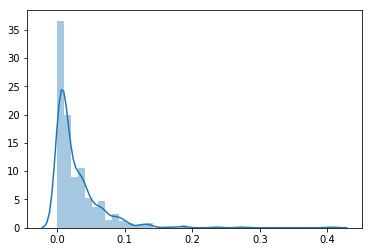

In [87]:
sns.distplot(err_array,bins=40)

In [88]:
df_topredictcpy.head()


,peral,perga,perin,a,b,c,alpha_reduced,beta_reduced,gamma_reduced,sg12,sg33,sg167,sg194,sg206,sg227
0,0.1875,0.4688,0.3438,0.405312,0.346696,0.370619,0.891089,0.849057,0.75,0,1,0,0,0,0
1,0.7500,0.2500,0.0000,0.380531,0.326977,0.351146,0.891089,0.849057,0.75,0,1,0,0,0,0
2,0.6667,0.1667,0.1667,0.191581,0.191569,0.518458,0.891089,0.849057,1.00,0,0,1,0,0,0
3,0.5625,0.4375,0.0000,0.936038,0.231119,0.221615,0.891089,0.981132,0.75,1,0,0,0,0,0
4,0.1875,0.5000,0.3125,0.947858,0.241946,0.236881,0.891089,0.990566,0.75,1,0,0,0,0,0


In [89]:
df_cpy.head()

,peral,perga,perin,a,b,c,alpha_reduced,beta_reduced,gamma_reduced,sg12,sg33,sg167,sg194,sg206,sg227
0,0.6250,0.3750,0.000,0.382781,0.328896,0.352981,0.891089,0.849057,0.750000,0,1,0,0,0,0
1,0.6250,0.3750,0.000,0.237846,0.237838,0.908796,0.891089,0.849057,1.000000,0,0,0,1,0,0
2,0.8125,0.1875,0.000,0.375038,0.217673,0.537038,0.900990,0.858491,0.258333,0,0,0,0,0,1
3,0.7500,0.0000,0.250,0.192446,0.192438,0.520454,0.891089,0.849057,1.000000,0,0,1,0,0,0
4,0.0000,0.6250,0.375,0.256208,0.256200,0.945435,0.891089,0.849057,1.000000,0,0,0,1,0,0


In [90]:
band_to_predict= clf_random_band.predict(df_topredictcpy)

In [91]:
enthalpy_to_predict = clf_random_enthalpy.predict(df_topredictcpy)

In [92]:
df_cpy.head()

,peral,perga,perin,a,b,c,alpha_reduced,beta_reduced,gamma_reduced,sg12,sg33,sg167,sg194,sg206,sg227
0,0.6250,0.3750,0.000,0.382781,0.328896,0.352981,0.891089,0.849057,0.750000,0,1,0,0,0,0
1,0.6250,0.3750,0.000,0.237846,0.237838,0.908796,0.891089,0.849057,1.000000,0,0,0,1,0,0
2,0.8125,0.1875,0.000,0.375038,0.217673,0.537038,0.900990,0.858491,0.258333,0,0,0,0,0,1
3,0.7500,0.0000,0.250,0.192446,0.192438,0.520454,0.891089,0.849057,1.000000,0,0,1,0,0,0
4,0.0000,0.6250,0.375,0.256208,0.256200,0.945435,0.891089,0.849057,1.000000,0,0,0,1,0,0


In [93]:
features = clf_random_band.feature_importances_

In [94]:
features

array([  1.94931679e-01,   9.89008029e-03,   5.79332353e-01,
         4.92276124e-02,   2.08138665e-02,   1.20988548e-01,
         1.52028180e-03,   2.10934729e-03,   9.38734120e-04,
         1.06971621e-04,   6.53284870e-04,   2.66605913e-03,
         1.53326291e-03,   2.49055692e-04,   1.50388634e-02])

In [95]:
cols = ['peral','perga','perin','a','b','c','alpha_reduced','beta_reduced','gamma_reduced','sg12','sg33','sg167','sg194','sg207','sg225']

Text(0.5,1,'Feature importances')

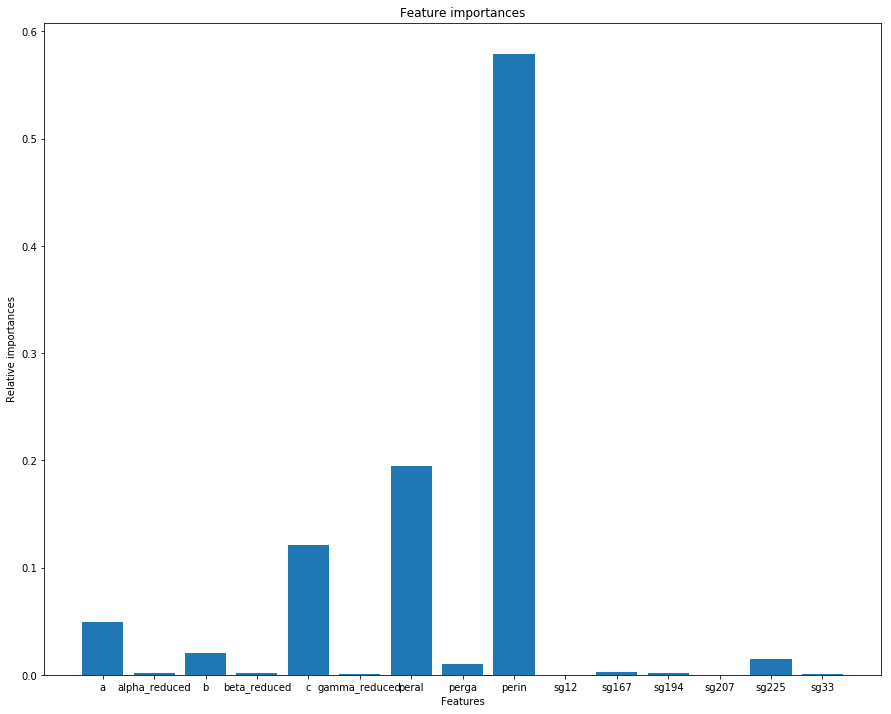

In [96]:
plt.subplots(figsize=(15,12))
plt.bar(cols,features)
plt.xlabel("Features")
plt.ylabel("Relative importances")
plt.title("Feature importances")



In [97]:
features_enthalpy=clf_random_enthalpy.feature_importances_

In [98]:
cols = ['peral','perga','perin','a','b','c','alpha_reduced','beta_reduced','gamma_reduced','sg12','sg33','sg167','sg194','sg207','sg225']

Text(0.5,1,'Feature importance')

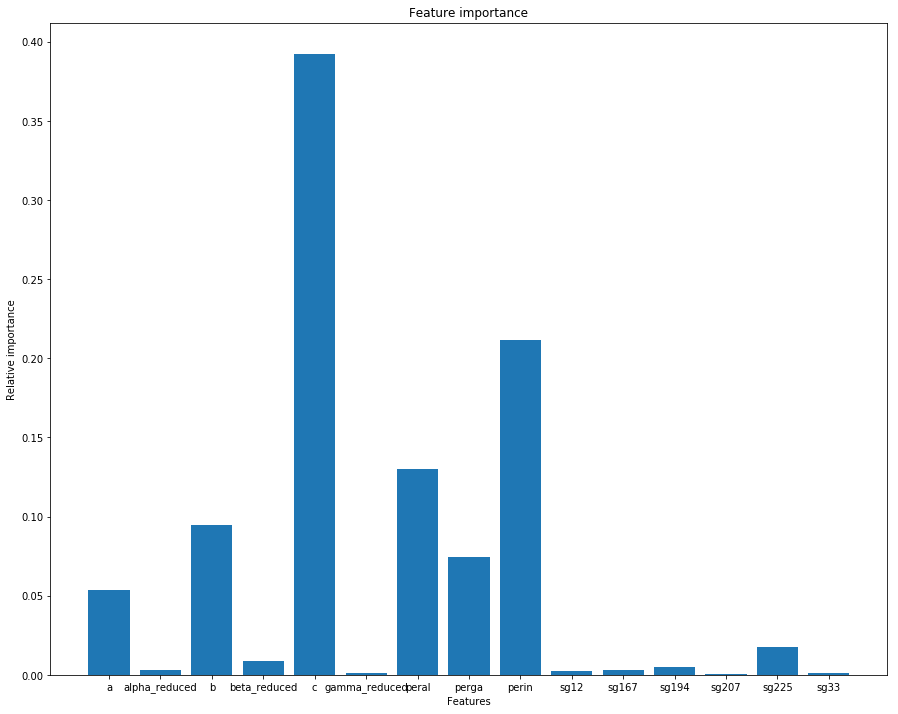

In [99]:
plt.subplots(figsize=(15,12))
plt.bar(cols,features_enthalpy)
plt.xlabel("Features")
plt.ylabel("Relative importance")
plt.title("Feature importance")

In [ ]:
band_to_predict

In [ ]:
enthalpy_to_predict

To be continued